In [1]:
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
import xgboost as xgb

Defaulting to user installation because normal site-packages is not writeable


In [76]:
df = pd.read_csv("healthcare_data.csv")
df.head(2)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9


In [73]:
df.corr(numeric_only=True)

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),Age1,Age2,mean
Available Extra Rooms in Hospital,1.000000,-0.001784,-0.006388,0.070459,-0.050127,-0.019219,-0.039162,-0.039221,-0.039192
staff_available,-0.001784,1.000000,-0.000453,0.000578,0.000763,0.007398,0.003457,0.003466,0.003461
patientid,-0.006388,-0.000453,1.000000,-0.006095,0.010864,0.006169,0.010377,0.010386,0.010382
Visitors with Patient,0.070459,0.000578,-0.006095,1.000000,-0.069043,0.027302,0.022168,0.022301,0.022235
Admission_Deposit,-0.050127,0.000763,0.010864,-0.069043,1.000000,0.044203,0.022597,0.022721,0.022659
Stay (in days),-0.019219,0.007398,0.006169,0.027302,0.044203,1.000000,0.579307,0.580756,0.580033
Age1,-0.039162,0.003457,0.010377,0.022168,0.022597,0.579307,1.000000,0.999985,0.999996
Age2,-0.039221,0.003466,0.010386,0.022301,0.022721,0.580756,0.999985,1.000000,0.999996
mean,-0.039192,0.003461,0.010382,0.022235,0.022659,0.580033,0.999996,0.999996,1.000000


In [77]:
df1 = df.copy()
df1.drop(columns = ["staff_available","patientid","doctor_name","Age1","Age2","Age"], inplace = True)
df1.rename(columns = {"mean" : "Age"}, inplace = True)

KeyError: "['Age1', 'Age2'] not found in axis"

In [75]:
df1.head(2)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),mean
0,4,gynecology,D,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,45.5
1,4,gynecology,B,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,35.5


In [3]:
df.value_counts()

Available Extra Rooms in Hospital  Department          Ward_Facility_Code  doctor_name  staff_available  patientid  Age    gender  Type of Admission  Severity of Illness  health_conditions    Visitors with Patient  Insurance  Admission_Deposit  Stay (in days)
0                                  TB & Chest disease  A                   Dr John      2                101490     31-40  Other   Trauma             Extreme              Other                3                      Yes        4781.576026        12                1
4                                  gynecology          B                   Dr Sophia    3                70315      21-30  Female  Emergency          Minor                Heart disease        7                      Yes        4732.910314        7                 1
                                                                                                         72987      21-30  Female  Trauma             Extreme              Diabetes             4                 

In [4]:
df.duplicated().any()

False

In [5]:
df.columns

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit',
       'Stay (in days)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

In [7]:
df['health_conditions'] = df['health_conditions'].fillna('Other')

In [8]:
#df.fillna('other', inplace = True)

In [9]:
# First of all we have to extract the age into two columns
# Then take its mean values
df[['Age1', 'Age2']] = df['Age'].str.extract(r'(\d+)-(\d+)')
df['Age1'] = pd.to_numeric(df['Age1'])
df['Age2'] = pd.to_numeric(df['Age2'])
df["mean"] = df[['Age1','Age2']].mean(axis=1)

In [10]:
df.head(100)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Age1,Age2,mean
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,41.0,50.0,45.5
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,31.0,40.0,35.5
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,21.0,30.0,25.5
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,Other,4,No,4814.149231,8,31.0,40.0,35.5
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,71.0,80.0,75.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,radiotherapy,E,Dr John,8,41395,21-30,Other,Urgent,Minor,High Blood Pressure,6,Yes,5379.441445,25,21.0,30.0,25.5
96,2,gynecology,F,Dr Nathan,2,72703,31-40,Female,Emergency,Minor,Other,2,No,5846.414922,9,31.0,40.0,35.5
97,1,gynecology,F,Dr Olivia,2,8447,31-40,Female,Emergency,Moderate,Other,2,No,4246.709854,10,31.0,40.0,35.5
98,4,radiotherapy,E,Dr John,9,128984,41-50,Female,Emergency,Extreme,Diabetes,4,Yes,3720.666237,7,41.0,50.0,45.5


In [11]:
df1 = df.copy()
df1.drop(['Age','Age1','Age2','Available Extra Rooms in Hospital','Ward_Facility_Code','doctor_name','patientid','Visitors with Patient'], axis = 1, inplace = True)
df1.rename(columns = {'mean' : 'Age'}, inplace = True)

In [12]:
df1.head(200)

,Department,staff_available,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days),Age
0,gynecology,0,Female,Trauma,Extreme,Diabetes,Yes,2966.408696,8,45.5
1,gynecology,2,Female,Trauma,Minor,Heart disease,No,3554.835677,9,35.5
2,gynecology,8,Female,Trauma,Extreme,Diabetes,Yes,5624.733654,7,25.5
3,gynecology,7,Female,Urgent,Moderate,Other,No,4814.149231,8,35.5
4,anesthesia,10,Male,Trauma,Moderate,Diabetes,No,5169.269637,34,75.5
...,...,...,...,...,...,...,...,...,...,...
195,gynecology,5,Female,Emergency,Moderate,Other,Yes,3779.076088,9,35.5
196,gynecology,5,Female,Trauma,Moderate,Heart disease,Yes,3497.252514,9,35.5
197,gynecology,2,Female,Trauma,Minor,High Blood Pressure,Yes,4103.792852,7,35.5
198,gynecology,10,Female,Trauma,Moderate,Other,Yes,3938.979822,8,25.5


In [72]:
df1.corr(numeric_only=True)

,staff_available,Admission_Deposit,Stay (in days),Age
staff_available,1.000000,0.000763,0.007398,0.003461
Admission_Deposit,0.000763,1.000000,0.044203,0.022659
Stay (in days),0.007398,0.044203,1.000000,0.580033
Age,0.003461,0.022659,0.580033,1.000000


#### The Function that show us the uique value of each columns

In [13]:
def unique_values(col):
    print(f"{col} : {df1[col].unique()}")
    
for col in df1.columns:
    unique_values(col)
    print("_"*100)

Department : ['gynecology' 'anesthesia' 'TB & Chest disease' 'radiotherapy' 'surgery']
____________________________________________________________________________________________________
staff_available : [ 0  2  8  7 10  5  9  3  6  4  1]
____________________________________________________________________________________________________
gender : ['Female' 'Male' 'Other']
____________________________________________________________________________________________________
Type of Admission : ['Trauma' 'Urgent' 'Emergency']
____________________________________________________________________________________________________
Severity of Illness : ['Extreme' 'Minor' 'Moderate']
____________________________________________________________________________________________________
health_conditions : ['Diabetes' 'Heart disease' 'Other' 'Asthama' 'High Blood Pressure']
____________________________________________________________________________________________________
Insurance : ['Yes' 'No']


#### Seperate Categorical Variable and Numeric

In [14]:
# Categorical Varaible
catg_vars = df1.select_dtypes(include = ["object"]).columns
# Numerical Variable
num_vars = df1.select_dtypes(include = ["int32",'int64','float32','float64']).columns

#### Visualize categorical Varaible Department, gender, Type of Admission, Severity of Illness, health_conditions, Insurance

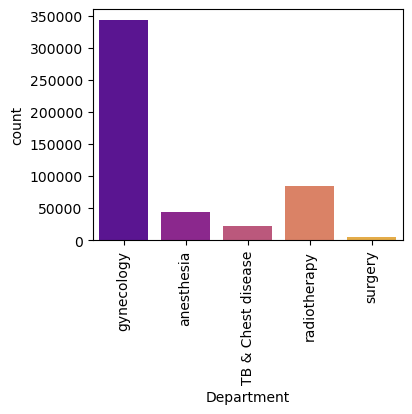

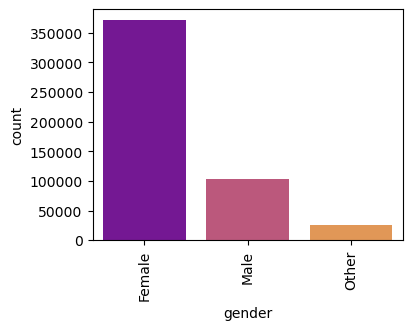

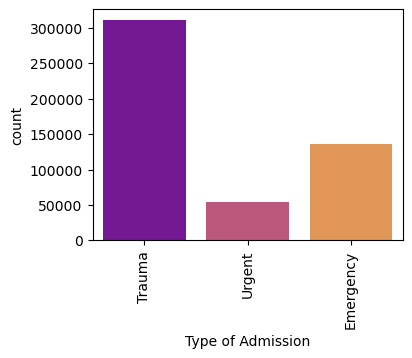

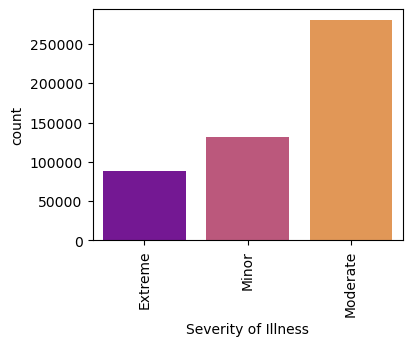

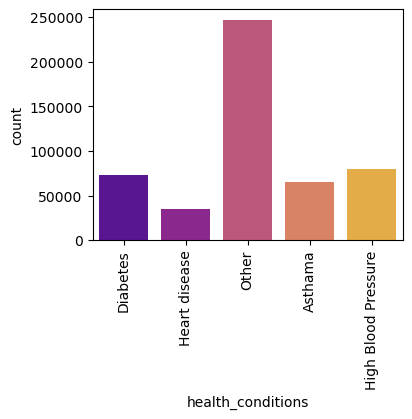

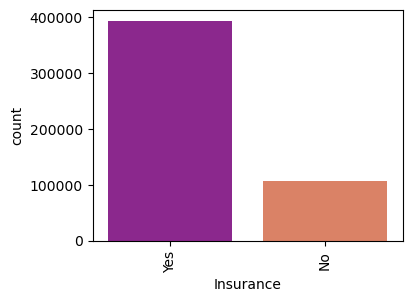

In [15]:
# Visualize Department columns
import matplotlib.pyplot as plt
import seaborn as sb

def draw_countplot(col):
    plt.figure(figsize = (4,3))
    sb.countplot(x = df1[col], hue = df1[col], palette = "plasma")
    plt.xticks(rotation = 'vertical')
    plt.show()
    
for col in catg_vars:
    draw_countplot(col)


### Gender 

In [16]:
# In gender columns have three variable 
# Male, Female, Other
df1['gender'].value_counts()

gender
Female    370810
Male      103480
Other      25710
Name: count, dtype: int64

In [17]:
# Now we have two condition
# First to remove Other 
# 2nd Apply dummies variable
# I apply first condition
df2 = df1.copy()
df2 = df1[df1['gender'] != 'Other']

In [18]:
df2.gender.value_counts()

gender
Female    370810
Male      103480
Name: count, dtype: int64

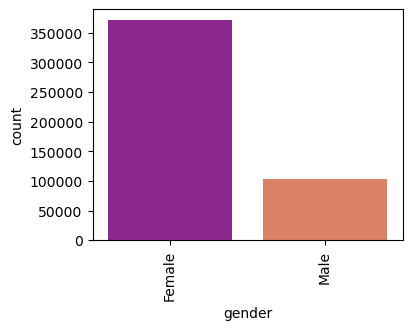

In [19]:
plt.figure(figsize = (4,3))
sb.countplot(x = df2['gender'], hue = df2['gender'], palette = "plasma", legend=False)
plt.xticks(rotation = 'vertical')
plt.show()

#### Health Conditions

In [20]:
df2['health_conditions'].value_counts()

health_conditions
Other                  233717
High Blood Pressure     75332
Diabetes                69553
Asthama                 61764
Heart disease           33924
Name: count, dtype: int64

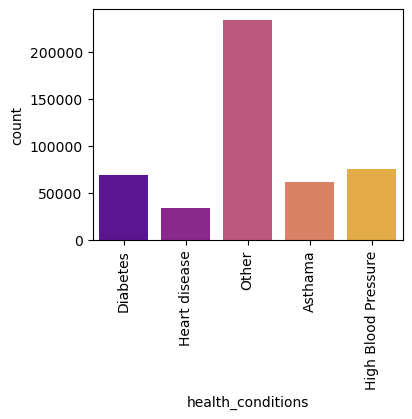

In [21]:
plt.figure(figsize = (4,3))
sb.countplot(x = df2['health_conditions'], hue = df2['health_conditions'], palette = "plasma", legend=False)
plt.xticks(rotation = 'vertical')
plt.show()

#### Now To Apply one hot encoding on Categorical variable

In [22]:
df2.head(200)

,Department,staff_available,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days),Age
0,gynecology,0,Female,Trauma,Extreme,Diabetes,Yes,2966.408696,8,45.5
1,gynecology,2,Female,Trauma,Minor,Heart disease,No,3554.835677,9,35.5
2,gynecology,8,Female,Trauma,Extreme,Diabetes,Yes,5624.733654,7,25.5
3,gynecology,7,Female,Urgent,Moderate,Other,No,4814.149231,8,35.5
4,anesthesia,10,Male,Trauma,Moderate,Diabetes,No,5169.269637,34,75.5
...,...,...,...,...,...,...,...,...,...,...
219,gynecology,4,Female,Emergency,Moderate,Other,Yes,3250.698861,9,25.5
220,gynecology,4,Female,Trauma,Moderate,Other,Yes,4829.442337,10,25.5
222,gynecology,2,Female,Trauma,Moderate,Other,Yes,3169.833743,8,45.5
224,TB & Chest disease,2,Female,Emergency,Moderate,Other,Yes,5121.367997,21,25.5


In [23]:
df3 = df2.copy()
df3 = pd.get_dummies(df2, columns = ['Department', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance'])
# Used this code to change False and True to 0 and 1
dummy_columns = df3.columns.difference(df2.columns)
df3[dummy_columns] = df3[dummy_columns].astype(int)

In [24]:
df3

,staff_available,Admission_Deposit,Stay (in days),Age,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,...,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other,Insurance_No,Insurance_Yes
0,0,2966.408696,8,45.5,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,2,3554.835677,9,35.5,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,8,5624.733654,7,25.5,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,7,4814.149231,8,35.5,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,10,5169.269637,34,75.5,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2,4105.795901,10,NaN,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
499996,8,4631.550257,11,35.5,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
499997,3,5456.930075,8,NaN,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
499998,1,4694.127772,23,65.5,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0


In [25]:
df3['Age'].mean()

38.24044894962993

In [26]:
df3.fillna(38.240, inplace = True)
df3.astype(int)

,staff_available,Admission_Deposit,Stay (in days),Age,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,...,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other,Insurance_No,Insurance_Yes
0,0,2966,8,45,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,2,3554,9,35,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,8,5624,7,25,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,7,4814,8,35,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,10,5169,34,75,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2,4105,10,38,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
499996,8,4631,11,35,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
499997,3,5456,8,38,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
499998,1,4694,23,65,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0


In [27]:
df3

,staff_available,Admission_Deposit,Stay (in days),Age,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,...,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other,Insurance_No,Insurance_Yes
0,0,2966.408696,8,45.50,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,2,3554.835677,9,35.50,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,8,5624.733654,7,25.50,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,7,4814.149231,8,35.50,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,10,5169.269637,34,75.50,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2,4105.795901,10,38.24,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
499996,8,4631.550257,11,35.50,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
499997,3,5456.930075,8,38.24,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
499998,1,4694.127772,23,65.50,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0


In [28]:
#df3.corr()

<Axes: >

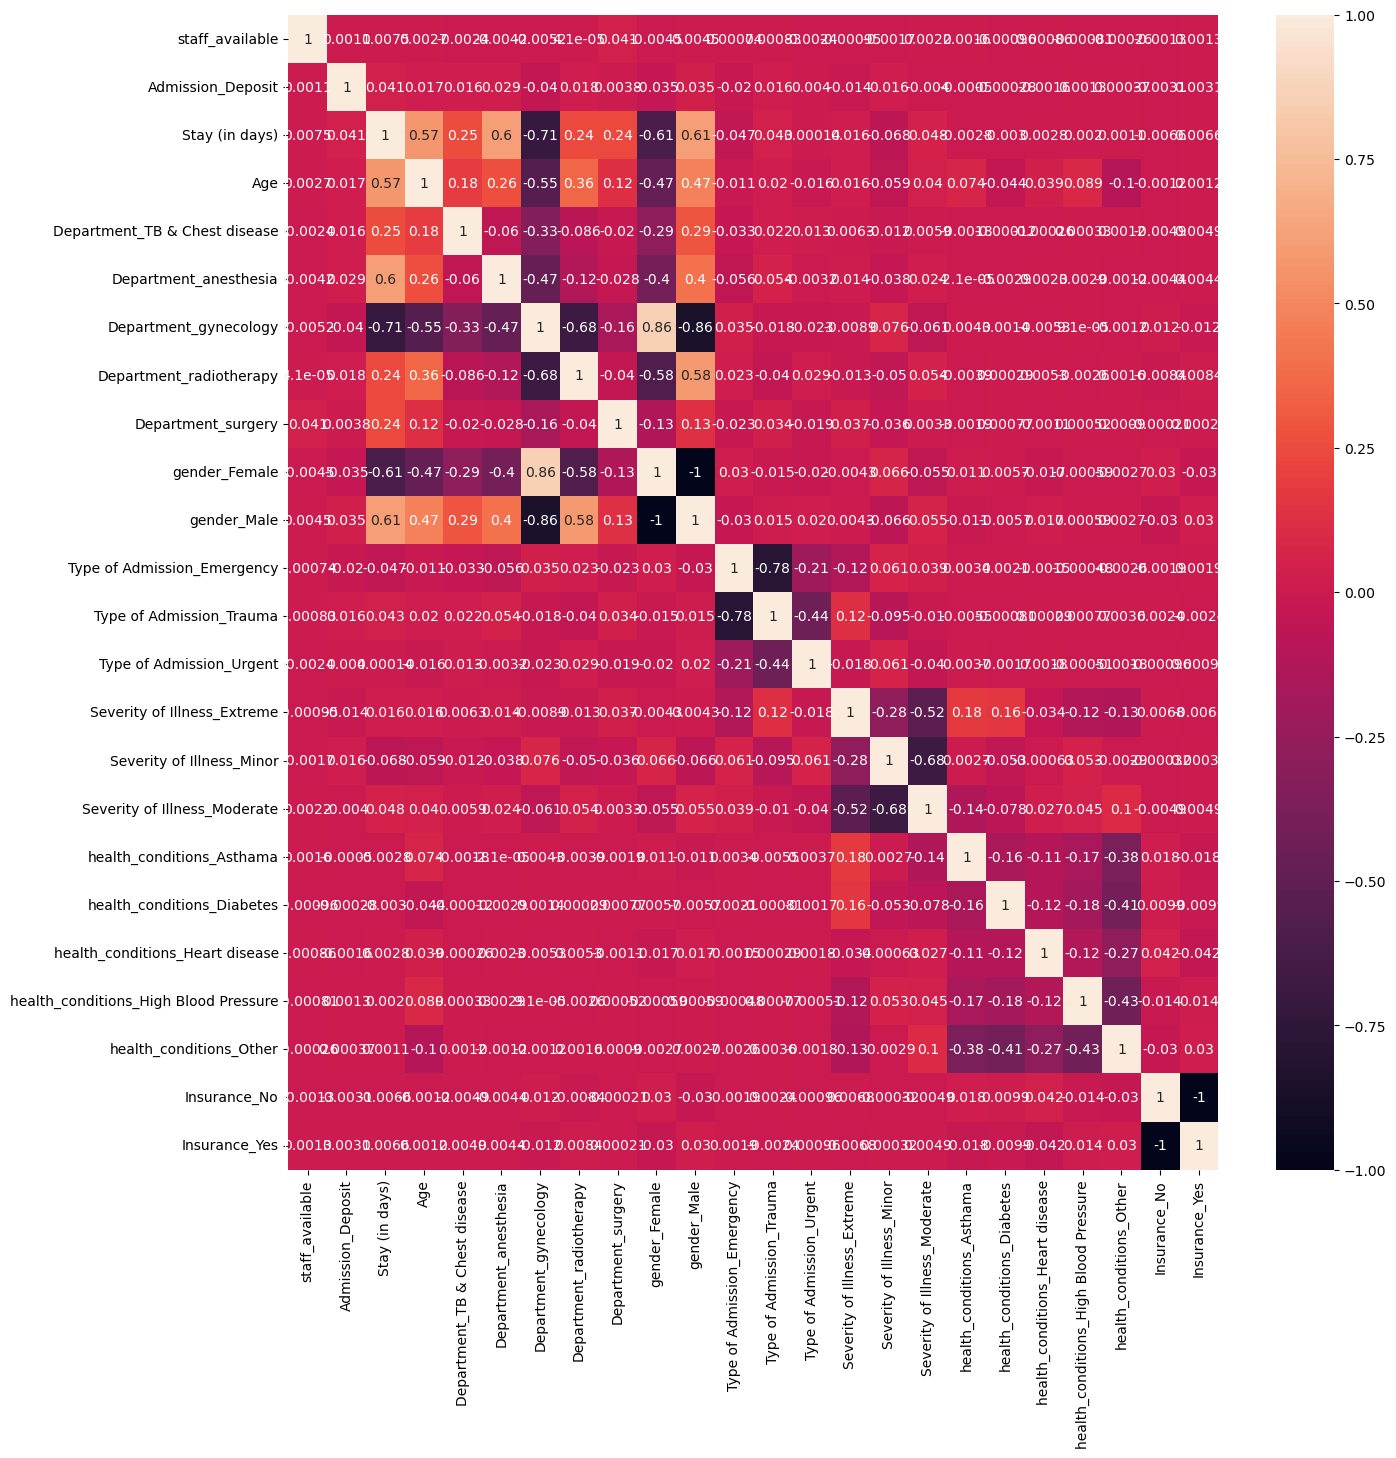

In [29]:
plt.figure(figsize = (15,15))
sb.heatmap(df3.corr(), annot = True)

In [45]:
x

,staff_available,Stay (in days),Age,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,gender_Male,...,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other,Insurance_No,Insurance_Yes
0,0,8,45.50,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,2,9,35.50,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,8,7,25.50,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3,7,8,35.50,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
4,10,34,75.50,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2,10,38.24,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
499996,8,11,35.50,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
499997,3,8,38.24,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
499998,1,23,65.50,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0


In [30]:
x = df3.drop(['Admission_Deposit'], axis = 1)
y = df3['Admission_Deposit']

In [31]:
y

0         2966.408696
1         3554.835677
2         5624.733654
3         4814.149231
4         5169.269637
             ...     
499995    4105.795901
499996    4631.550257
499997    5456.930075
499998    4694.127772
499999    4713.868519
Name: Admission_Deposit, Length: 474290, dtype: float64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 7)

In [42]:
y_test

356898    4313.834976
126102    4827.830886
35528     5104.739793
286268    4112.580158
372519    5507.987733
             ...     
160455    5096.845968
451873    6838.826075
152236    4368.988938
138407    4189.244705
252678    4661.453187
Name: Admission_Deposit, Length: 142287, dtype: float64

In [33]:
from sklearn.linear_model import LinearRegression 

In [34]:
regr = LinearRegression()

In [35]:
regr.fit(x_train, y_train)

LinearRegression()

In [36]:
y_prediction = regr.predict(x_test)

In [1]:
y_prediction

NameError: name 'y_prediction' is not defined

In [38]:
#y_test

In [43]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_prediction)
print("R² score:", r2)

R² score: 0.003067788063374488


In [44]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_prediction)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 749.6330366029088


In [48]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 100)
RF.fit(x_train, y_train)

RandomForestRegressor()

In [49]:
y_pred = RF.predict(x_test)

In [50]:
y_pred

array([4697.08574255, 4661.69496185, 5383.58389898, ..., 4868.37885857,
       4784.5341091 , 4880.55363509])

In [51]:
y_test

356898    4313.834976
126102    4827.830886
35528     5104.739793
286268    4112.580158
372519    5507.987733
             ...     
160455    5096.845968
451873    6838.826075
152236    4368.988938
138407    4189.244705
252678    4661.453187
Name: Admission_Deposit, Length: 142287, dtype: float64

In [54]:
from sklearn.metrics import accuracy_score

In [57]:
RF.score(x_test, y_test)

-0.07290266815997759

In [58]:
regr.score(x_test,y_test)

0.003067788063374488

In [65]:
from sklearn.linear_model import Ridge
RG = Ridge()
RG_Model = RG.fit(x_train, y_train)
RG_Model.score(x_test,y_test)

0.003067792512891132

In [67]:
RG_Model.predict(x_test)

array([4741.14349337, 4743.88928758, 4681.4365783 , ..., 4741.06526805,
       4736.47061175, 4712.60391646])

In [68]:
y_test

356898    4313.834976
126102    4827.830886
35528     5104.739793
286268    4112.580158
372519    5507.987733
             ...     
160455    5096.845968
451873    6838.826075
152236    4368.988938
138407    4189.244705
252678    4661.453187
Name: Admission_Deposit, Length: 142287, dtype: float64